In [0]:
!pip install missingno

# Importar
import pandas as pd
import pandas_profiling
import numpy as pnx
import missingno as msno

%matplotlib inline

In [0]:
# Dataset mortalidade
df_sim_es_2016 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR_MH3HjwGWD0icAnZ3LVxxKUIxYNgAE3R-m-P61g0T2iXE9bs3hjeItGKTJqIUslIOAFN7TrE2ghGM/pub?output=csv')
df_sim_es_2015 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSQAjV9c7HSRNciS8zQZFtlffe-X0V8Wcc5EAM9wqhVGPHnI3IpAaliYwadmK4nHiKPz9GbXn_-xNNC/pub?gid=817434201&single=true&output=csv')
df_sim_es_2014 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRGEAcKThbNaB9Kfp2vdoWZIMjUaVLwDF0Cf9_534xkV2iDWv4SZACgDBG7CnhzjXd_dCvwvadINdL1/pub?gid=1932938775&single=true&output=csv')
df_sim_es_2013 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRf-ecv5pdc0k2GR3SBdoCeZtRM6SPjSyQDFVwlUmzd8YsPVWPwZvx3ZnM8y_B5kBcFH-QxYIyTuYzr/pub?gid=1342589125&single=true&output=csv')
df_sim_es_2012 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS9XW4Hxc0QwEENpDDXLIBgDkyaTz89AXhgYYDcw7lHhBRjnLyQ2Y7B77fMV2LVmivKhSABYr-2fcFx/pub?gid=508819616&single=true&output=csv')

df_sim_es_raw = pd.concat([df_sim_es_2016, df_sim_es_2015, df_sim_es_2014, df_sim_es_2013, df_sim_es_2012])

# Dataset trauma
CID_trauma = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTsXEZ0NxkDPBwmt5XInfUcDTJPcRga4JZ9qd9X8MJBq_RaEpwi3TxmCeG9u05DF5fBGxV7bo_fgy6g/pub?output=csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [0]:
CID_trauma

,CIDs
0,S681
1,W019
2,S601
3,S602
4,S800
5,S400
6,S700
7,S900
8,S836
9,S934


In [0]:
# Seleção do dataset

## Não fetais
df_sim_es_raw['TIPOBITO']
df_donf = df_sim_es_raw.loc[df_sim_es_raw['TIPOBITO'] == 2]

## CID Trauma em listas
list_trauma = list(CID_trauma['CIDs'])

## Retirar caracteres especiais
df_donfx = df_donf.replace(regex=r'\*', value='')

## Trauma dentro do SIM
df_trauma = df_donfx[df_donfx[['LINHAA','LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']].isin(list_trauma)] #será que um atrapalha o outro?

NameError: ignored

In [0]:
# Contagem
df_trauma.LINHAA.count()

6693

In [0]:
# This Function will convert categorical data to numerical data and put the data of different category into different column
def one_hot_coding(Data,column_name):
    thal_value = Data[column_name].tolist()
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(thal_value)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    new_df = pd.DataFrame(onehot_encoded)
    new_df = rename_column(new_df,column_name)
    return new_df

In [0]:
# This function rename the columns created by above column 
def rename_column(new_df,column_name):
    col_list = []
    for i in range(0,len(new_df.columns)):
        col_list.append(column_name+'_'+str(i))
    new_df.columns = col_list
    return new_df

In [0]:
# Converting the categorical data to numerical data
new_df_ACIDTRAB = one_hot_coding(df_trauma,'ACIDTRAB')
new_df_ALTCAUSA = one_hot_coding(df_trauma,'ALTCAUSA')
new_df_ASSISTMED = one_hot_coding(df_trauma,'ASSISTMED')
new_df_ATESTADO = one_hot_coding(df_trauma,'ATESTADO')
new_df_ATESTANTE = one_hot_coding(df_trauma,'ATESTANTE')
new_df_CAUSABAS = one_hot_coding(df_trauma,'CAUSABAS')
new_df_CAUSABAS_O = one_hot_coding(df_trauma,'CAUSABAS_O')
new_df_CAUSAMAT = one_hot_coding(df_trauma,'CAUSAMAT')
new_df_CB_PRE = one_hot_coding(df_trauma,'CB_PRE')
new_df_CIRCOBITO = one_hot_coding(df_trauma,'CIRCOBITO')
new_df_CIRURGIA = one_hot_coding(df_trauma,'CIRURGIA')
new_df_CODCART = one_hot_coding(df_trauma,'CODCART')
new_df_CODESTAB = one_hot_coding(df_trauma,'CODESTAB')
new_df_CODIFICADO = one_hot_coding(df_trauma,'CODIFICADO')
new_df_CODINST = one_hot_coding(df_trauma,'CODINST')
new_df_CODMUNCART = one_hot_coding(df_trauma,'CODMUNCART')
new_df_CODMUNNATU = one_hot_coding(df_trauma,'CODMUNNATU')
new_df_CODMUNOCOR = one_hot_coding(df_trauma,'CODMUNOCOR')
new_df_CODMUNRES = one_hot_coding(df_trauma,'CODMUNRES')
new_df_COMUNSVOIM = one_hot_coding(df_trauma,'COMUNSVOIM')
new_df_CRM = one_hot_coding(df_trauma,'CRM')
new_df_DIFDATA = one_hot_coding(df_trauma,'DIFDATA')
new_df_DTCADINF = one_hot_coding(df_trauma,'DTCADINF')
new_df_DTCADINV = one_hot_coding(df_trauma,'DTCADINV')
new_df_DTCONCASO = one_hot_coding(df_trauma,'DTCONCASO')
new_df_DTCONINV = one_hot_coding(df_trauma,'DTCONINV')
new_df_DTATESTADO = one_hot_coding(df_trauma,'DTATESTADO')
new_df_DTINVESTIG = one_hot_coding(df_trauma,'DTINVESTIG')
new_df_DTNASC = one_hot_coding(df_trauma,'DTNASC')
new_df_DTOBITO = one_hot_coding(df_trauma,'DTOBITO')
new_df_DTRECEBIM = one_hot_coding(df_trauma,'DTRECEBIM')
new_df_DTRECORIG = one_hot_coding(df_trauma,'DTRECORIG')
new_df_DTRECORIGA = one_hot_coding(df_trauma,'DTRECORIGA')
new_df_DTREGCART = one_hot_coding(df_trauma,'DTREGCART')
new_df_ESC = one_hot_coding(df_trauma,'ESC')
new_df_ESC2010 = one_hot_coding(df_trauma,'ESC2010')
new_df_ESCFALAGR1 = one_hot_coding(df_trauma,'ESCFALAGR1')
new_df_ESCMAE = one_hot_coding(df_trauma,'ESCMAE')
new_df_ESCMAE2010 = one_hot_coding(df_trauma,'ESCMAE2010')
new_df_ESCMAEAGR1 = one_hot_coding(df_trauma,'ESCMAEAGR1')
new_df_ESTABDESCR = one_hot_coding(df_trauma,'ESTABDESCR')
new_df_ESTCIV = one_hot_coding(df_trauma,'ESTCIV')
new_df_EXAME = one_hot_coding(df_trauma,'EXAME')
new_df_FONTE = one_hot_coding(df_trauma,'FONTE')
new_df_FONTEINV = one_hot_coding(df_trauma,'FONTEINV')
new_df_FONTES = one_hot_coding(df_trauma,'FONTES')
new_df_FONTESINF = one_hot_coding(df_trauma,'FONTESINF')
new_df_GESTACAO = one_hot_coding(df_trauma,'GESTACAO')
new_df_GRAVIDEZ = one_hot_coding(df_trauma,'GRAVIDEZ')
new_df_HORAOBITO = one_hot_coding(df_trauma,'HORAOBITO')
new_df_IDADE = one_hot_coding(df_trauma,'IDADE')
new_df_IDADEMAE = one_hot_coding(df_trauma,'IDADEMAE')
new_df_LINHAA = one_hot_coding(df_trauma,'LINHAA')
new_df_LINHAB = one_hot_coding(df_trauma,'LINHAB')
new_df_LINHAC = one_hot_coding(df_trauma,'LINHAC')
new_df_LINHAD = one_hot_coding(df_trauma,'LINHAD')
new_df_LINHAII = one_hot_coding(df_trauma,'LINHAII')
new_df_LOCOCOR = one_hot_coding(df_trauma,'LOCOCOR')
new_df_NATURAL = one_hot_coding(df_trauma,'NATURAL')
new_df_MORTEPARTO = one_hot_coding(df_trauma,'MORTEPARTO')
new_df_NECROPSIA = one_hot_coding(df_trauma,'NECROPSIA')
new_df_NUDIASINF = one_hot_coding(df_trauma,'NUDIASINF')
new_df_NUDIASOBCO = one_hot_coding(df_trauma,'NUDIASOBCO')
new_df_NUDIASOBIN = one_hot_coding(df_trauma,'NUDIASOBIN')
new_df_NUMERODN = one_hot_coding(df_trauma,'NUMERODN')
new_df_NUMERODO = one_hot_coding(df_trauma,'NUMERODO')
new_df_NUMERODV = one_hot_coding(df_trauma,'NUMERODV')
new_df_NUMEROLOTE = one_hot_coding(df_trauma,'NUMEROLOTE')
new_df_NUMREGCART = one_hot_coding(df_trauma,'NUMREGCART')
new_df_NUMSUS = one_hot_coding(df_trauma,'NUMSUS')
new_df_OBITOGRAV = one_hot_coding(df_trauma,'OBITOGRAV')
new_df_OBITOPARTO = one_hot_coding(df_trauma,'OBITOPARTO')
new_df_OBITOPUERP = one_hot_coding(df_trauma,'OBITOPUERP')
new_df_OCUP = one_hot_coding(df_trauma,'OCUP')
new_df_ORIGEM = one_hot_coding(df_trauma,'ORIGEM')
new_df_OCUPMAE = one_hot_coding(df_trauma,'OCUPMAE')
new_df_PARTO = one_hot_coding(df_trauma,'PARTO')
new_df_PESO = one_hot_coding(df_trauma,'PESO')
new_df_QTDFILMORT = one_hot_coding(df_trauma,'QTDFILMORT')
new_df_QTDFILVIVO = one_hot_coding(df_trauma,'QTDFILVIVO')
new_df_RACACOR = one_hot_coding(df_trauma,'RACACOR')
new_df_SEMAGESTAC = one_hot_coding(df_trauma,'SEMAGESTAC')
new_df_SERIESCFAL = one_hot_coding(df_trauma,'SERIESCFAL')
new_df_SERIESCMAE = one_hot_coding(df_trauma,'SERIESCMAE')
new_df_SEXO = one_hot_coding(df_trauma,'SEXO')
new_df_STCODIFICA = one_hot_coding(df_trauma,'STCODIFICA')
new_df_STDOEPIDEM = one_hot_coding(df_trauma,'STDOEPIDEM')
new_df_STDONOVA = one_hot_coding(df_trauma,'STDONOVA')
new_df_TIPOBITO = one_hot_coding(df_trauma,'TIPOBITO')
new_df_TPMORTEOCO = one_hot_coding(df_trauma,'TPMORTEOCO')
new_df_TPNIVELINV = one_hot_coding(df_trauma,'TPNIVELINV')
new_df_TPOBITOCOR = one_hot_coding(df_trauma,'TPOBITOCOR')
new_df_TPPOS = one_hot_coding(df_trauma,'TPPOS')
new_df_TPRESGINFO = one_hot_coding(df_trauma,'TPRESGINFO')
new_df_TPRESGINFO = one_hot_coding(df_trauma,'TPRESGINFO')
new_df_Unnamed = one_hot_coding(df_trauma,'Unnamed: 0')
new_df_VERSAOSCB = one_hot_coding(df_trauma,'VERSAOSCB')
new_df_VERSAOSIST = one_hot_coding(df_trauma,'VERSAOSIST')

NameError: ignored

In [0]:
# Merging all the feature Dataframe into single Dataframe
Merged_df = pd.concat(  
    [new_df_ACIDTRAB, new_df_ALTCAUSA, new_df_ASSISTMED, new_df_ATESTADO, new_df_ATESTANTE,
     new_df_CAUSABAS, new_df_CAUSABAS_O, new_df_CAUSAMAT, new_df_CB_PRE, new_df_CIRCOBITO, 
     new_df_CIRURGIA, new_df_CODCART, new_df_CODESTAB, new_df_CODIFICADO, new_df_CODINST,
     new_df_CODMUNCART, new_df_CODMUNNATU, new_df_CODMUNOCOR, new_df_CODMUNRES, new_df_COMUNSVOIM,
     new_df_CRM, new_df_DIFDATA, new_df_DTCADINF, new_df_DTCADINV, new_df_DTCONCASO, new_df_DTCONINV,
     new_df_DTATESTADO, new_df_DTINVESTIG, new_df_DTNASC, new_df_DTOBITO, new_df_DTRECEBIM, new_df_DTRECORIG,
     new_df_DTRECORIGA, new_df_DTREGCART, new_df_ESC, new_df_ESC2010, new_df_ESCFALAGR1, new_df_ESCMAE,
     new_df_ESCMAE2010, new_df_ESCMAEAGR1, new_df_ESTABDESCR, new_df_ESTCIV, new_df_EXAME, new_df_FONTE,
     new_df_FONTEINV, new_df_FONTES, new_df_FONTESINF, new_df_GESTACAO, new_df_GRAVIDEZ, new_df_HORAOBITO, 
     new_df_IDADE, new_df_IDADEMAE, new_df_LINHAA, new_df_LINHAB, new_df_LINHAC, new_df_LINHAD, new_df_LINHAII, 
     new_df_LOCOCOR, new_df_NATURAL, new_df_MORTEPARTO, new_df_NECROPSIA, new_df_NUDIASINF, new_df_NUDIASOBCO, 
     new_df_NUDIASOBIN, new_df_NUMERODN, new_df_NUMERODO, new_df_NUMERODV, new_df_NUMEROLOTE, new_df_NUMREGCART, 
     new_df_NUMSUS, new_df_OBITOGRAV, new_df_OBITOPARTO, new_df_OBITOPUERP, new_df_OCUP, new_df_ORIGEM, 
     new_df_OCUPMAE, new_df_PARTO, new_df_PESO, new_df_QTDFILMORT,new_df_QTDFILVIVO, new_df_RACACOR, 
     new_df_SEMAGESTAC, new_df_SERIESCFAL, new_df_SERIESCMAE, new_df_SEXO, new_df_STCODIFICA, new_df_STDOEPIDEM,
     new_df_STDONOVA, new_df_TIPOBITO, new_df_TPMORTEOCO, new_df_TPNIVELINV, new_df_TPOBITOCOR, new_df_TPPOS,
     new_df_TPRESGINFO, new_df_TPRESGINFO, new_df_Unnamed, new_df_VERSAOSCB, new_df_VERSAOSIST], axis=1)

In [0]:
# Normalizing the numerical data and bring them in range 0 to 1
Merged_df['thalach'] = (Merged_df['thalach'] - np.min(Merged_df['thalach'])) / (np.max(Merged_df['thalach']) - np.min(Merged_df['thalach']))
Merged_df['oldpeak'] = (Merged_df['oldpeak'] - np.min(Merged_df['oldpeak'])) / (np.max(Merged_df['oldpeak']) - np.min(Merged_df['oldpeak']))

In [0]:
# Divide the data into input and Output data 
Merged_df['Output_variable'] = Data['target']
Input_DF = Merged_df.drop(['Output_variable'],axis =1)

In [0]:
# Divide the data into train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(Input_DF, Merged_df['Output_variable'], test_size=0.20, random_state=42)

In [0]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_trauma)

ValueError: ignored

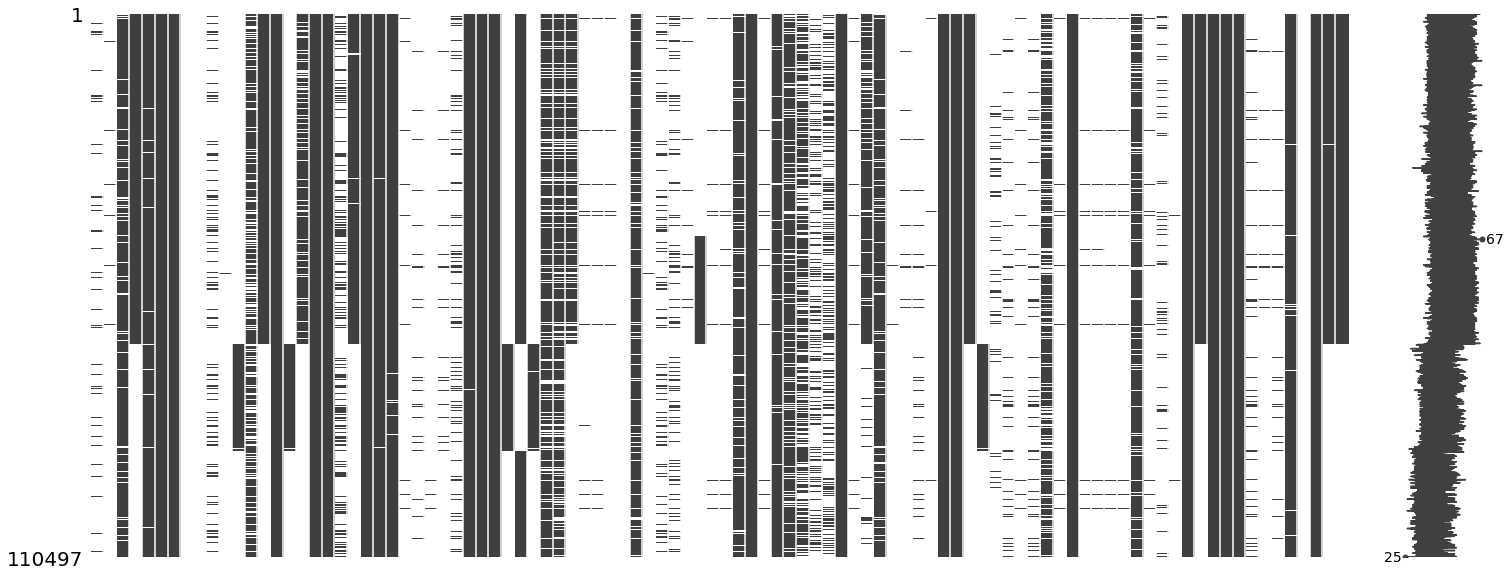

In [0]:
msno.matrix(df_donf)

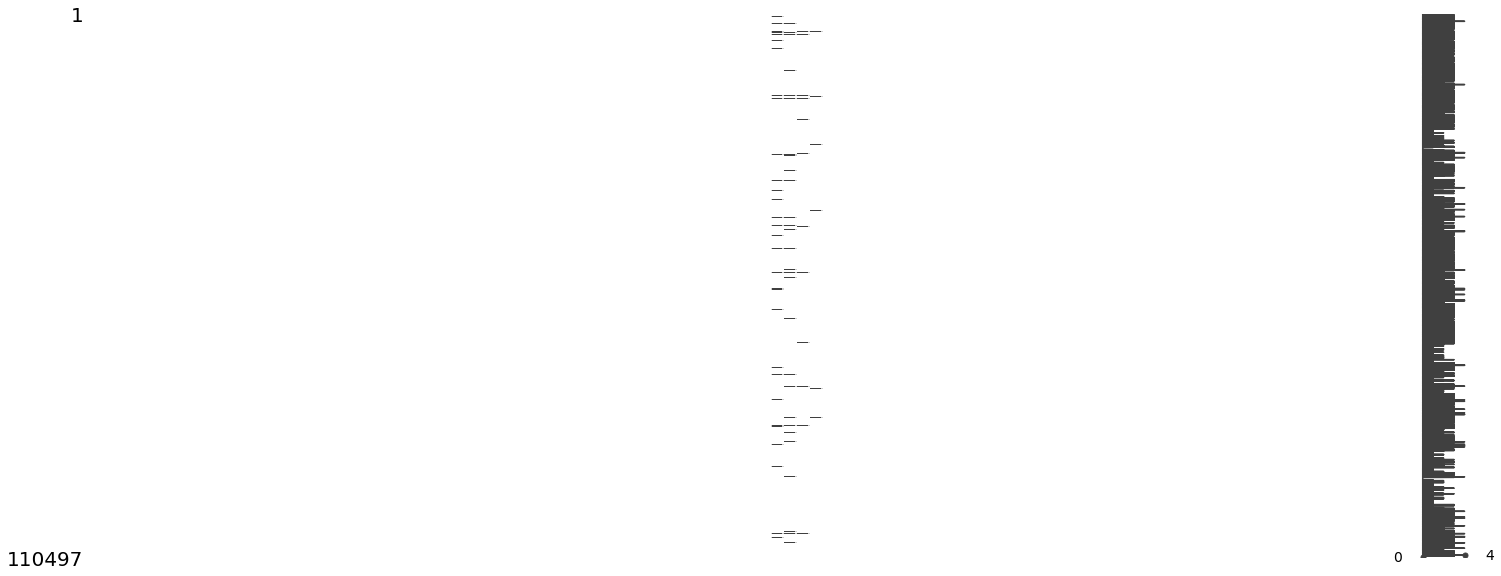

In [0]:
msno.matrix(df_trauma)

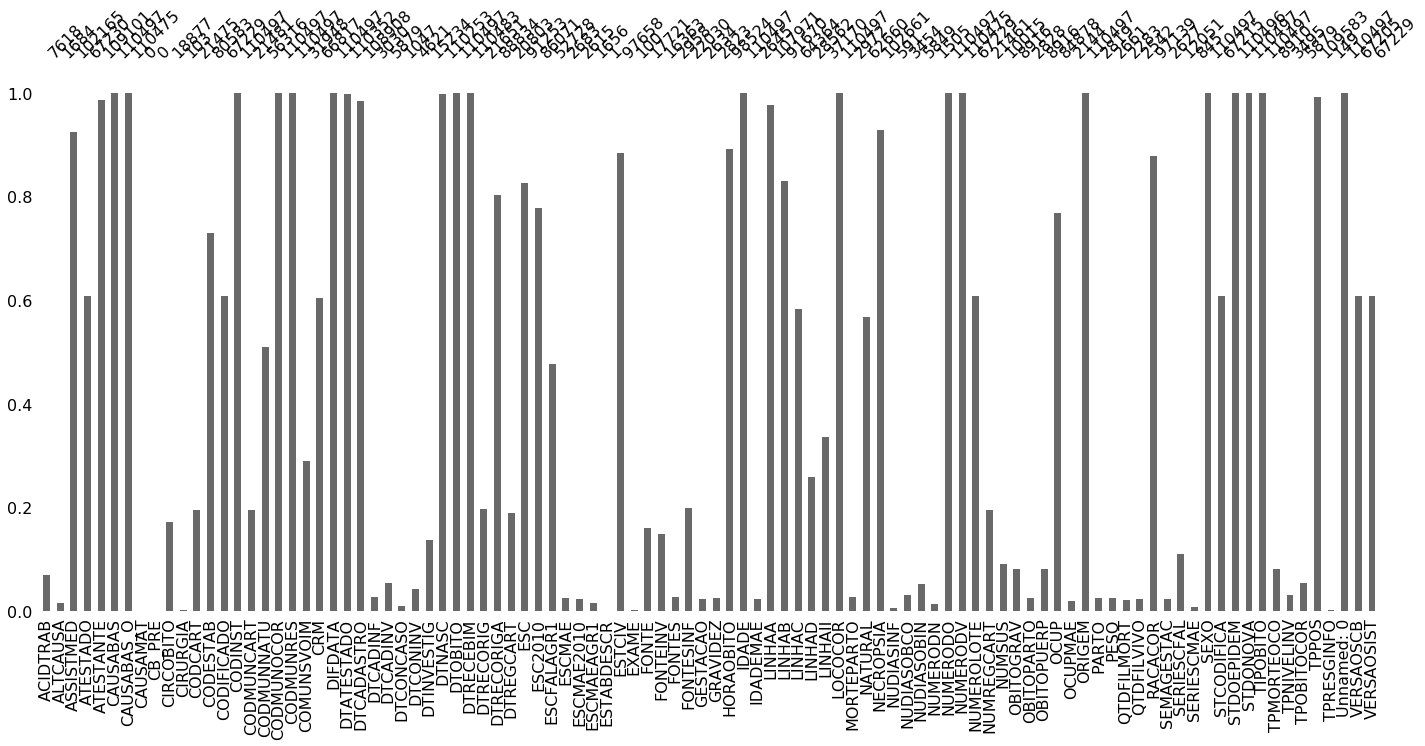

In [0]:
msno.bar(df_donf)

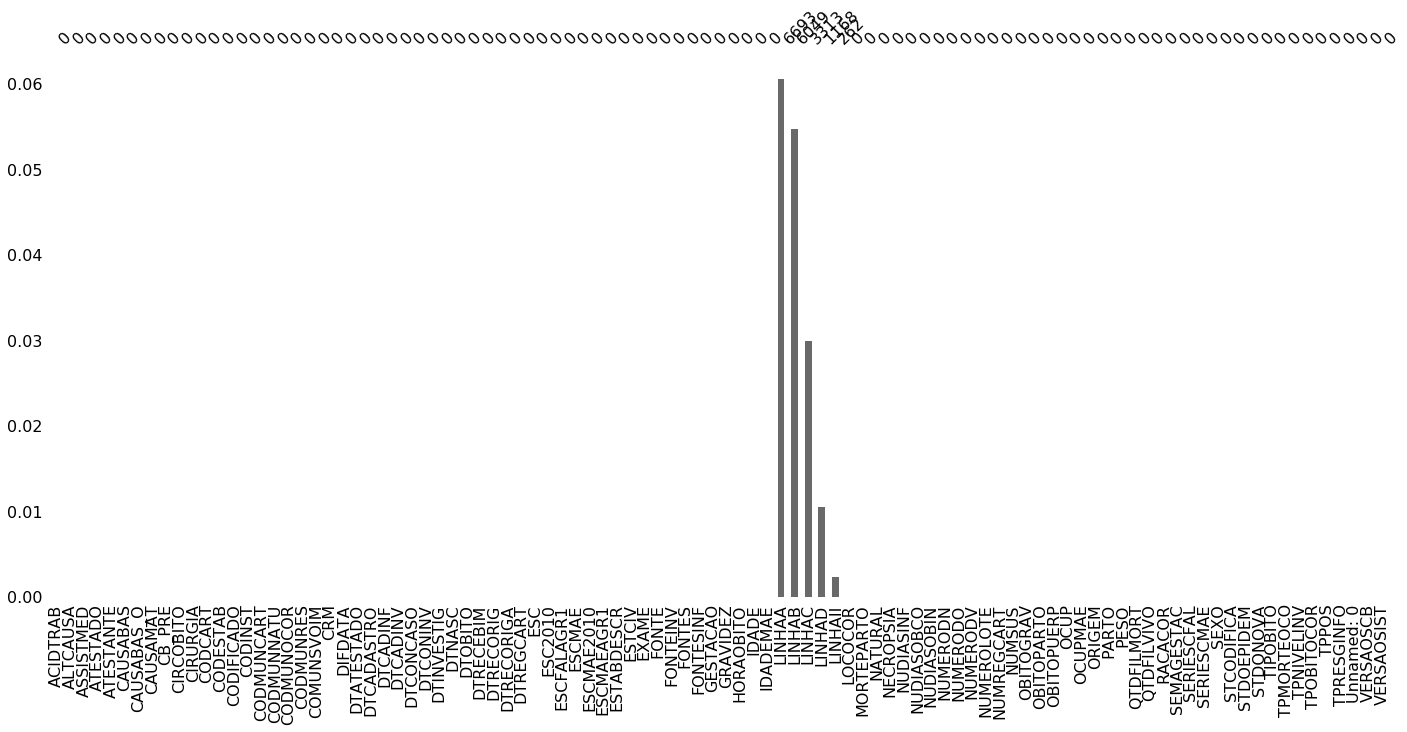

In [0]:
msno.bar(df_trauma)